This notebook documents the process of how we generate images of equations that can be used downstream as a dataset to train an equation detector.  
We use this dataset from: https://www.kaggle.com/datasets/xainano/handwrittenmathsymbols.

In [2]:
!pip install scikit-image


  Using cached scikit_image-0.25.2-cp312-cp312-macosx_12_0_arm64.whl.metadata (14 kB)
  Using cached scipy-1.15.2-cp312-cp312-macosx_14_0_arm64.whl.metadata (61 kB)
  Using cached imageio-2.37.0-py3-none-any.whl.metadata (5.2 kB)
  Using cached lazy_loader-0.4-py3-none-any.whl.metadata (7.6 kB)
Using cached scikit_image-0.25.2-cp312-cp312-macosx_12_0_arm64.whl (13.2 MB)
Using cached imageio-2.37.0-py3-none-any.whl (315 kB)
Using cached lazy_loader-0.4-py3-none-any.whl (12 kB)
Using cached scipy-1.15.2-cp312-cp312-macosx_14_0_arm64.whl (22.4 MB)


In [2]:
import numpy as np
import os, random
from skimage import io 
import matplotlib.pyplot as plt

In [3]:
directory = "/Users/abhaychougala/Documents/Clg/2nd year/4th SEM/IML/Project/equation-solver-master"
folder = "/Users/abhaychougala/Documents/Clg/2nd year/4th SEM/IML/Project/equation-solver-master/data"

# Step 1: Get random equations

In [4]:
def equation_generator(numbers=2, max_num=100):
    assert numbers > 1, "You need at least two numbers to generate a valid equation"
    # Generate numbers and operator
    generated_eqn = []
    operators = ['+', '-', '*','>','<','/','<=','>=','X']
    for number in range(numbers):
        gen_num = np.random.randint(max_num)
        generated_eqn.append(str(gen_num))
        operator_ind = np.random.randint(len(operators))
        operator = operators[operator_ind]
        generated_eqn.append(operator)
    # Remove the last operator and turn into string
    generated_eqn = generated_eqn[:-1]
    generated_eqn = ''.join(generated_eqn)
    ans = eval(generated_eqn)
    ans_string = '='+str(ans)
    return generated_eqn+ans_string
eqn = equation_generator(numbers=2, max_num=100)
print(eqn)

58>=96=False


# Step 2: Pick an image for each digit in the equation and generate the final image

In [6]:
def random_sample_file(directory):
    #  Randomly selects a file from a directory
    rfile = None
    n=0
    random.seed();
    for root, dirs, files in os.walk(directory):
        for name in files:
            n += 1
            if random.uniform(0, n) < 1:
                rfile=os.path.join(root, name)
    return rfile
def generate_eqn_image(folder, eqn):
    eqn_array = []
    # 1. Pick correct file
    for char in eqn:
        char_folder = f"{folder}/{char}"
        file = random_sample_file(char_folder) # Randomly sample an image from the directory, each (45X45)
        img = io.imread(file)
        eqn_array.append(img)
    # 2. Concatenate all images together into 1 giant image
    eqn = np.hstack(eqn_array)
    return eqn
generate_eqn_image(folder, eqn)

OSError: Cannot understand given URI: None.

# Step 3: Generate multiples of this and save in a folder

In [57]:
output_folder = "equation_images"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

13+20=33


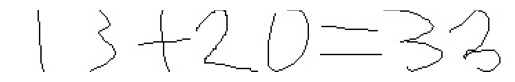

52+9=61


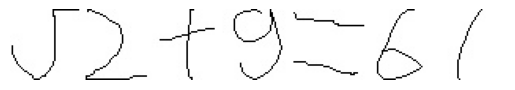

36-9=27


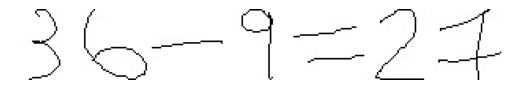

23+99=122


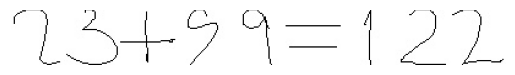

74*41=3034


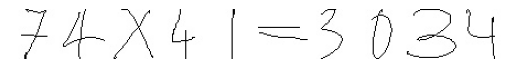

13+10=23


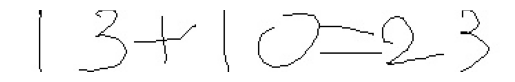

39*56=2184


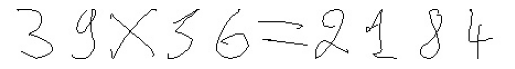

17-11=6


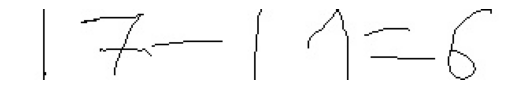

63*85=5355


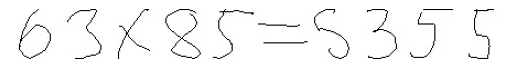

66-97=-31


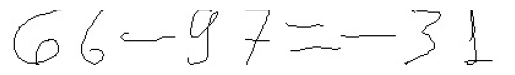

10-31=-21


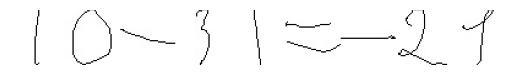

10*86=860


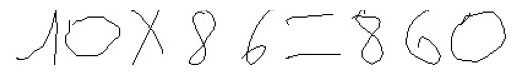

3-31=-28


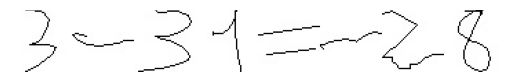

66-92=-26


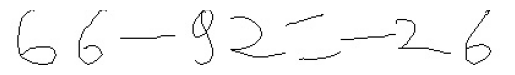

17+26=43


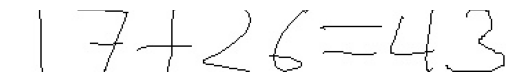

31-63=-32


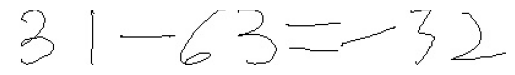

52*22=1144


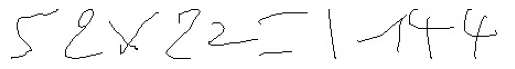

37*38=1406


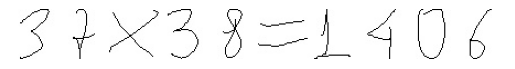

86+46=132


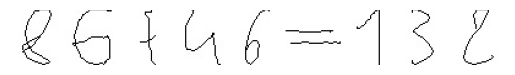

95+3=98


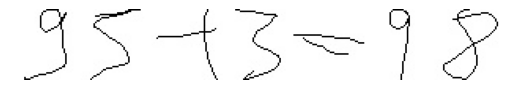

38+1=39


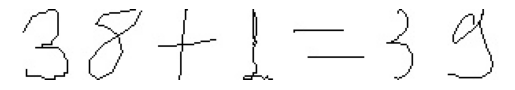

63*8=504


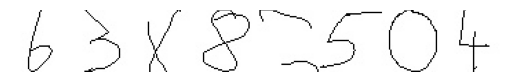

50-54=-4


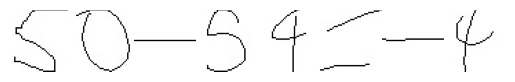

25+73=98


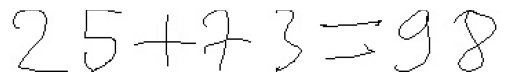

34+47=81


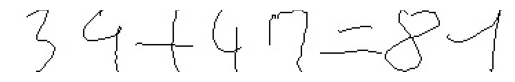

75+75=150


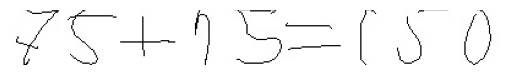

84+0=84


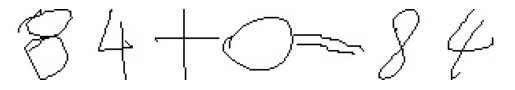

1*36=36


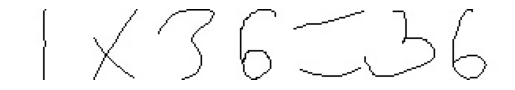

94-37=57


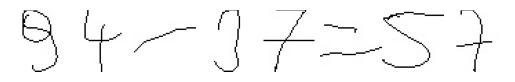

66-36=30


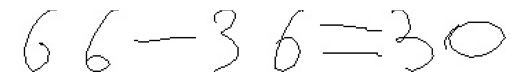

56*77=4312


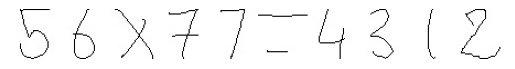

75+51=126


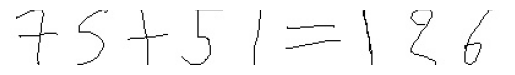

52+46=98


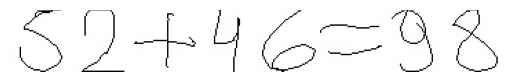

46*13=598


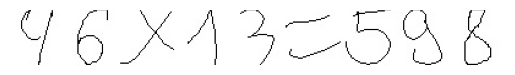

5*14=70


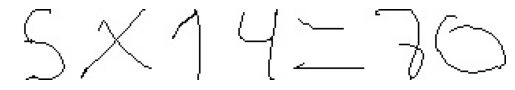

13*45=585


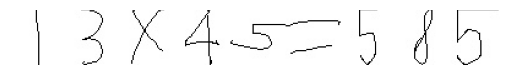

95-16=79


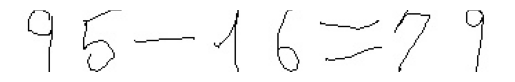

2+31=33


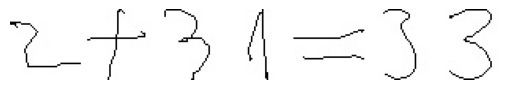

98*85=8330


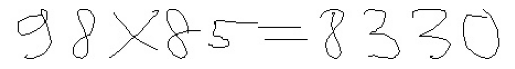

10*25=250


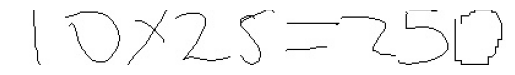

49*43=2107


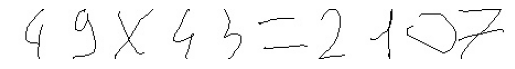

80-31=49


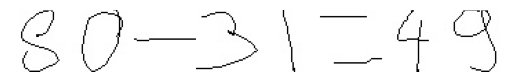

82-8=74


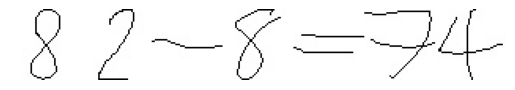

24-92=-68


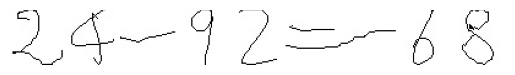

90+98=188


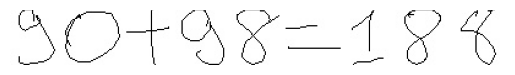

65+49=114


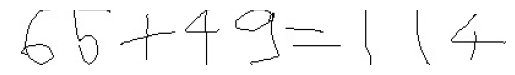

88+56=144


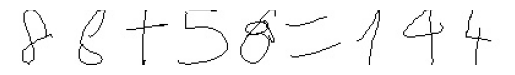

73*55=4015


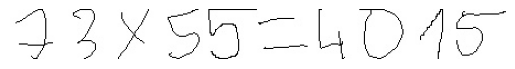

10*9=90


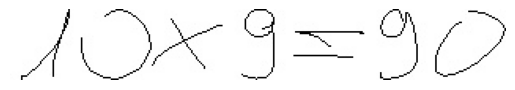

11*16=176


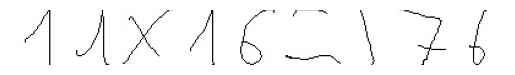

In [59]:
EQNS = 50
NUMBERS = 2 # We generate a set for two numbers
MAX_NUM = 100
SAVE = 1
for i in range(EQNS):
    eqn = equation_generator(numbers=NUMBERS, max_num=MAX_NUM)
    print(eqn)
    eqn_array = generate_eqn_image(folder, eqn)
    filename = f"{NUMBERS}numbers_{str(i).zfill(3)}.png"
    plt.imshow(eqn_array, cmap="gray")
    plt.axis('off')
    plt.savefig(output_folder+"/"+filename)
    plt.show()

32*67-31=2113


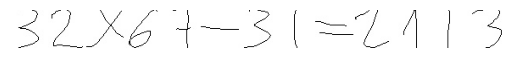

92*84-40=7688


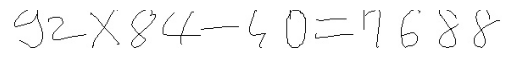

71+21-3=89


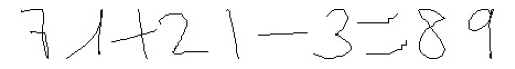

17-54+92=55


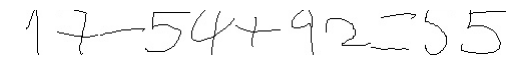

58*52+52=3068


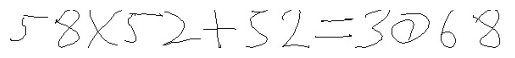

78-43*61=-2545


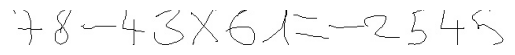

30-95+10=-55


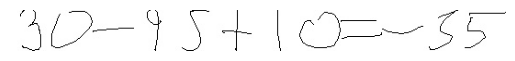

83*5*50=20750


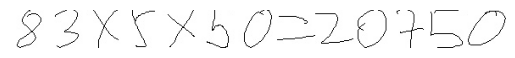

30-93*43=-3969


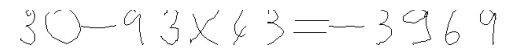

87+61+34=182


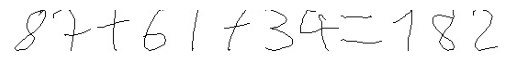

83*51+86=4319


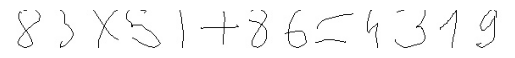

24+42*35=1494


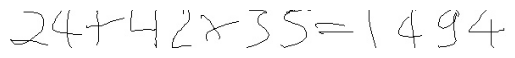

85-50-51=-16


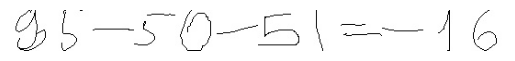

80+44-67=57


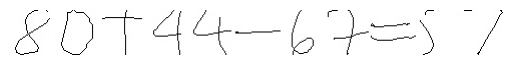

60*74+45=4485


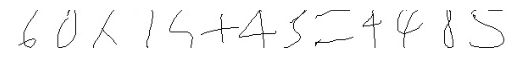

80+14*72=1088


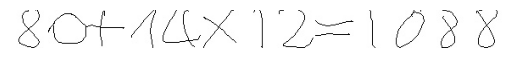

22-76-57=-111


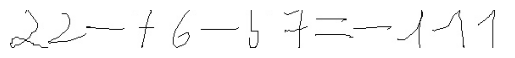

15+59*13=782


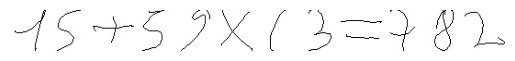

23*34+55=837


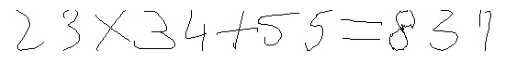

56-4-19=33


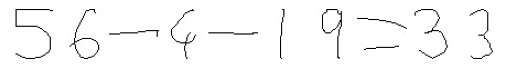

83+9*67=686


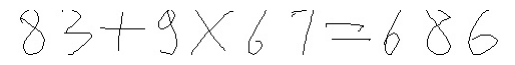

93-70*45=-3057


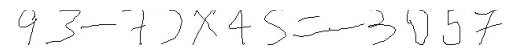

39-10+36=65


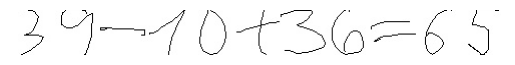

10-90+57=-23


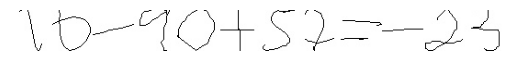

46-98-60=-112


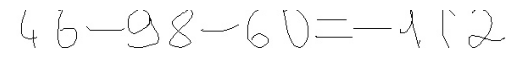

39-96+27=-30


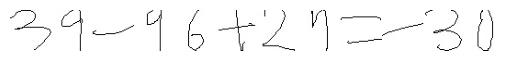

84*70*93=546840


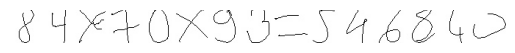

80+41-79=42


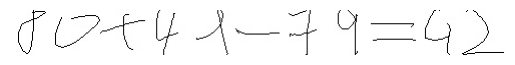

25*24-4=596


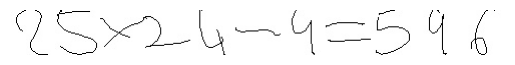

26*77*25=50050


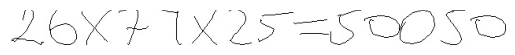

2*72-58=86


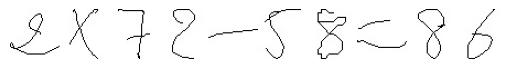

39+57-52=44


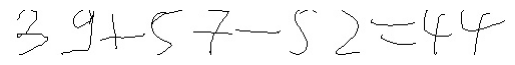

47*46+40=2202


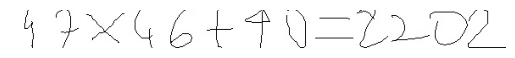

21*69*17=24633


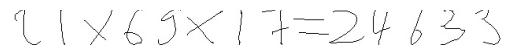

90+67*96=6522


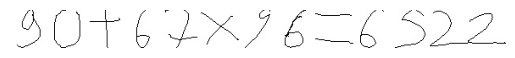

45+79+80=204


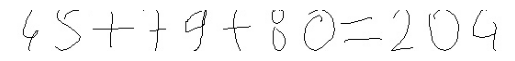

52+80-27=105


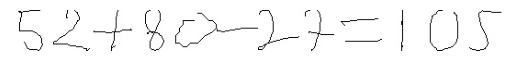

90+35+23=148


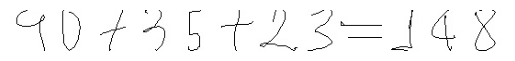

79*50-61=3889


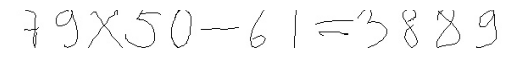

19-18*53=-935


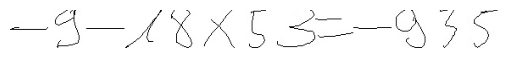

71+71-76=66


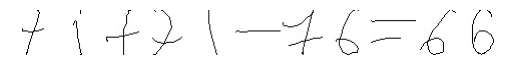

64+81-91=54


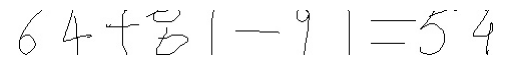

46*39+9=1803


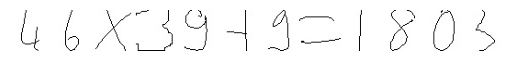

6+94*80=7526


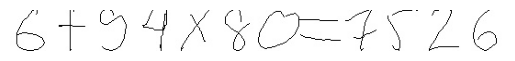

44+5+93=142


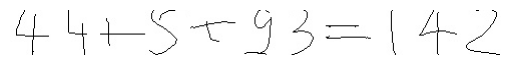

86+78*18=1490


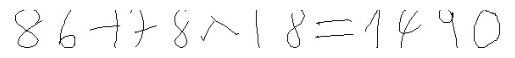

7+25+70=102


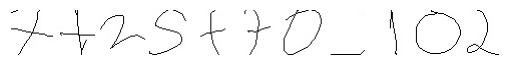

59+63*66=4217


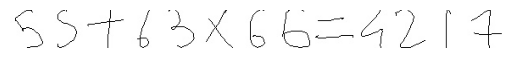

29+98*93=9143


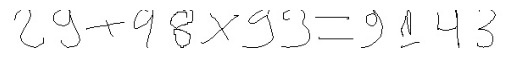

39+63*92=5835


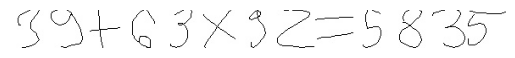

In [60]:
EQNS = 50
NUMBERS = 3 # We generate a set for two numbers
MAX_NUM = 100
SAVE = 1
for i in range(EQNS):
    eqn = equation_generator(numbers=NUMBERS, max_num=MAX_NUM)
    print(eqn)
    eqn_array = generate_eqn_image(folder, eqn)
    filename = f"{NUMBERS}numbers_{str(i).zfill(3)}.png"
    plt.imshow(eqn_array, cmap="gray")
    plt.axis('off')
    plt.savefig(output_folder+"/"+filename)
    plt.show()